<a href="https://colab.research.google.com/github/Danilofceroni/Inteligencia-Artificial/blob/main/620454_Base_E2_Regresion_Ultimo_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación 2

**Integrantes:**

+ Integrante 1: Diego Cartes : diego.cartes2001@alumnos.ubiobio.cl
+ Integrante 2: Danilo Ceroni: danilo.ceroni1901@alumnos.ubiobio.cl
+ Integrante 2: Francisco Diaz : francisco.diaz1901@alumnos.ubiobio.cl

**Fecha de Entrega:** 15 de Mayo 2025  
**Versión:** 1.0  

---

## Descripción

Este notebook contiene el desarrollo de la evaluación 2 de la asignatura de Inteligencia Artificial de la carrera Ingeniería Civil en Informática de la Universidad del Biío Bío - Sede Concepción

---


In [ ]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_regresion.csv

--2025-05-15 01:15:41--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_regresion.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 510280 (498K) [text/plain]
Saving to: ‘dataset_regresion.csv’

dataset_regresion.c 100%[===================>] 498.32K  2.53MB/s    in 0.2s    

2025-05-15 01:15:42 (2.53 MB/s) - ‘dataset_regresion.csv’ saved [510280/510280]



# Descripción del negocio

✅ **Nombre del negocio:** PeopleGrow Solutions

✅ **Industria:** Consultoría de desarrollo organizacional y gestión de talento

✅ **Objetivo del negocio:** Optimizar las estrategias de compensación salarial para mejorar la retención del talento y la satisfacción laboral, considerando múltiples factores del perfil de los empleados.

**Antecedentes**

PeopleGrow Solutions trabaja con empresas que buscan alinear sus políticas salariales con indicadores clave como nivel educativo, experiencia laboral, satisfacción de los empleados y modalidad de trabajo (presencial/remoto). La empresa ha recolectado datos sobre empleados de distintas áreas para entender qué factores están más fuertemente asociados con la variación en los salarios mensuales.

# Objetivo del proyecto

Desarrollar un modelo de regresión que permita predecir el salario mensual de un empleado, basándose en perfil educativo, experiencia laboral, nivel de satisfacción, características del puesto y otras variables disponibles dentro del set de datos

Esto permitirá:

✅ Identificar brechas salariales entre departamentos o niveles educativos.

✅ Diseñar políticas de compensación equitativas y competitivas.

✅ Detectar factores críticos que contribuyen a una mayor remuneración.

✅ Simular escenarios de promoción o cambio de modalidad de trabajo y su impacto salarial.

# Pregunta clave

Esta pregunta debe encontrar la respuesta en la fase 2 de entendimiento de los datos

✔ ¿Existen diferencias salariales significativas entre empleados remotos y presenciales?

# Fase 2 - Entendimiento de los datos

##2.1. Carga de datos y **librerías**

En esta sección se importan las librerías necesarias y se carga el dataset desde el enlace proporcionado.

In [ ]:
# Importar librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para modelado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_log_error

# Cargar el dataset
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_regresion.csv -O dataset_regresion.csv

df = pd.read_csv('dataset_regresion.csv')
df.head()

--2025-05-16 01:38:25--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_regresion.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 510280 (498K) [text/plain]
Saving to: ‘dataset_regresion.csv’

dataset_regresion.c 100%[===================>] 498.32K  2.31MB/s    in 0.2s    

2025-05-16 01:38:25 (2.31 MB/s) - ‘dataset_regresion.csv’ saved [510280/510280]



,ID,Edad,Nivel_Educativo,Experiencia_Anios,Departamento,Horas_Entrenamiento_Mensual,Satisfaccion_Laboral,Remoto,Salario_Mensual
0,1,56,Universitaria,38,Marketing,11,Alta,Sí,8230.50
1,2,46,Universitaria,23,TI,17,Muy Alta,No,6375.40
2,3,32,Técnica,13,TI,8,Media,No,4883.02
3,4,60,Secundaria,37,Finanzas,7,Alta,No,6739.09
4,5,25,Universitaria,7,Marketing,8,Alta,Sí,4729.60


## 2.2 Exploración y análisis descriptivo de los datos

Se explora la estructura del dataset, tipos de variables, valores nulos y se presentan estadísticas descriptivas de las variables numéricas y categóricas.

In [ ]:
# Información general del dataset
print("Dimensiones del dataset:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Estadísticas descriptivas de variables numéricas
display(df.describe())

# Estadísticas de variables categóricas
display(df.describe(include='object'))

Dimensiones del dataset: (10000, 9)

Tipos de datos:
ID                               int64
Edad                             int64
Nivel_Educativo                 object
Experiencia_Anios                int64
Departamento                    object
Horas_Entrenamiento_Mensual      int64
Satisfaccion_Laboral            object
Remoto                          object
Salario_Mensual                float64
dtype: object

Valores nulos por columna:
ID                             0
Edad                           0
Nivel_Educativo                0
Experiencia_Anios              0
Departamento                   0
Horas_Entrenamiento_Mensual    0
Satisfaccion_Laboral           0
Remoto                         0
Salario_Mensual                0
dtype: int64


,ID,Edad,Experiencia_Anios,Horas_Entrenamiento_Mensual,Salario_Mensual
count,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000
mean,5000.50000,41.557600,20.46160,10.000000,5764.693974
std,2886.89568,13.749581,13.23976,3.183711,1659.896370
min,1.00000,18.000000,0.00000,0.000000,1773.680000
25%,2500.75000,30.000000,9.00000,8.000000,4364.367500
50%,5000.50000,41.500000,20.00000,10.000000,5788.975000
75%,7500.25000,53.000000,32.00000,12.000000,7177.292500
max,10000.00000,65.000000,40.00000,23.000000,9641.940000


,Nivel_Educativo,Departamento,Satisfaccion_Laboral,Remoto
count,10000,10000,10000,10000
unique,4,5,4,2
top,Universitaria,Marketing,Alta,No
freq,3444,2077,3914,5902


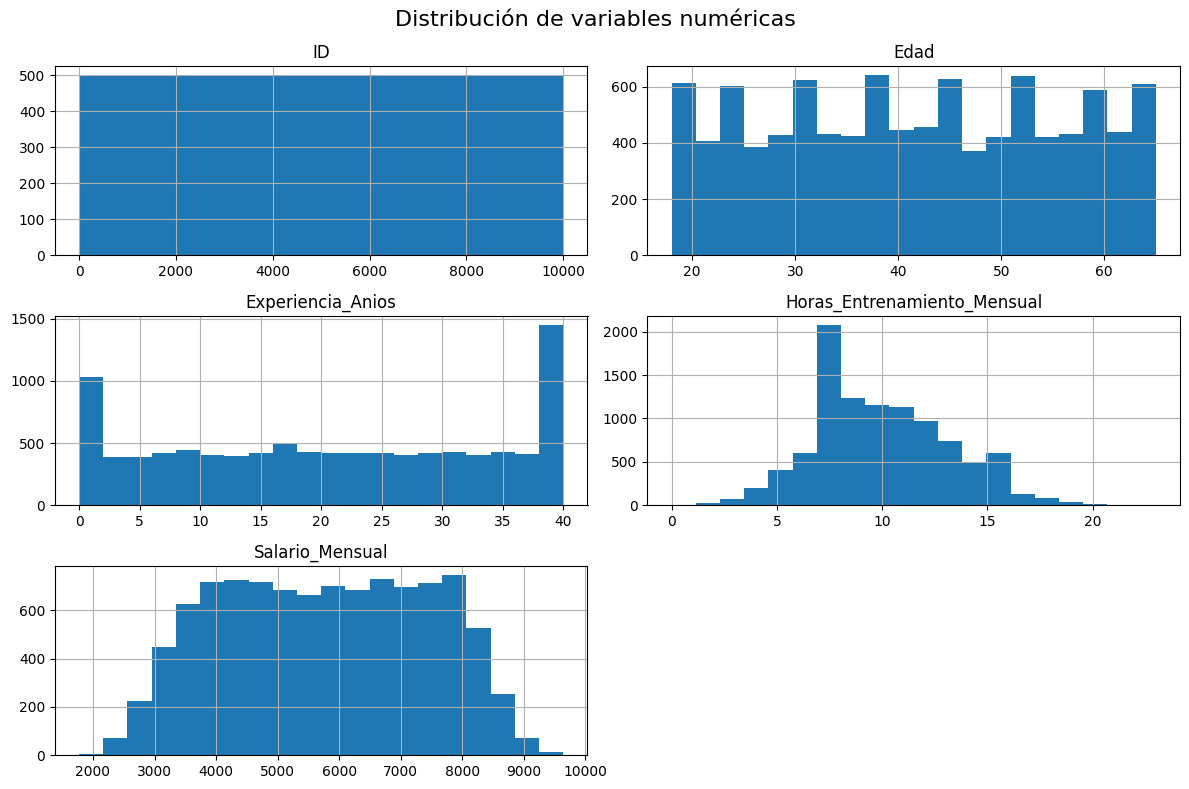


Conteo de Nivel_Educativo:
Nivel_Educativo
Universitaria    3444
Técnica          3032
Secundaria       1965
Postgrado        1559
Name: count, dtype: int64

Conteo de Departamento:
Departamento
Marketing           2077
Ventas              2023
TI                  1988
Finanzas            1965
Recursos Humanos    1947
Name: count, dtype: int64

Conteo de Satisfaccion_Laboral:
Satisfaccion_Laboral
Alta        3914
Media       3026
Muy Alta    2016
Baja        1044
Name: count, dtype: int64

Conteo de Remoto:
Remoto
No    5902
Sí    4098
Name: count, dtype: int64


In [ ]:
# Distribución de variables numéricas
df.hist(figsize=(12,8), bins=20)
plt.suptitle('Distribución de variables numéricas', fontsize=16)
plt.tight_layout()
plt.show()

# Conteo de valores para variables categóricas
categorical_cols = ['Nivel_Educativo', 'Departamento', 'Satisfaccion_Laboral', 'Remoto']
for col in categorical_cols:
    print(f"\nConteo de {col}:")
    print(df[col].value_counts())

## 2.3 Visualización y análisis de diferencias salariales entre empleados remotos y presenciales

Se analiza si existen diferencias salariales significativas entre empleados remotos y presenciales mediante gráficos y pruebas estadísticas.

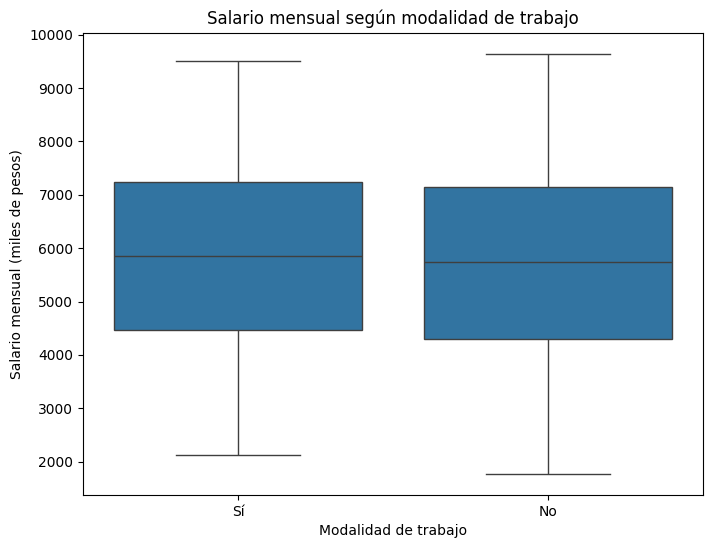

,count,mean,std,min,25%,50%,75%,max
Remoto,,,,,,,,
No,5902.0,5711.073636,1666.146518,1773.68,4305.5600,5741.49,7152.0225,9641.94
Sí,4098.0,5841.918775,1647.992633,2133.23,4457.6025,5844.23,7236.1350,9508.63


t-statistic: 3.887, p-value: 0.0001
Existe una diferencia salarial significativa entre empleados remotos y presenciales.


In [ ]:
# Boxplot de salario mensual por modalidad de trabajo
plt.figure(figsize=(8,6))
sns.boxplot(x='Remoto', y='Salario_Mensual', data=df)
plt.title('Salario mensual según modalidad de trabajo')
plt.xlabel('Modalidad de trabajo')
plt.ylabel('Salario mensual (miles de pesos)')
plt.show()

# Estadísticas descriptivas por modalidad
display(df.groupby('Remoto')['Salario_Mensual'].describe())

# Prueba estadística: t-test para diferencia de medias
from scipy.stats import ttest_ind

salario_remoto = df[df['Remoto']=='Sí']['Salario_Mensual']
salario_presencial = df[df['Remoto']=='No']['Salario_Mensual']

t_stat, p_value = ttest_ind(salario_remoto, salario_presencial, equal_var=False)
print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Existe una diferencia salarial significativa entre empleados remotos y presenciales.")
else:
    print("No se observa una diferencia salarial significativa entre empleados remotos y presenciales.")

In [ ]:
print(df['Remoto'].unique())
print(df.columns)

['Sí' 'No']
Index(['ID', 'Edad', 'Nivel_Educativo', 'Experiencia_Anios', 'Departamento',
       'Horas_Entrenamiento_Mensual', 'Satisfaccion_Laboral', 'Remoto',
       'Salario_Mensual'],
      dtype='object')


# Fase 3 - Preparación de los datos

## 3.1 Transformación y codificación de variables categóricas

Se justifican y aplican técnicas de transformación para las variables categóricas relevantes.

**Justificación de la transformación de variables:**

- *Nivel Educativo*: Es una variable ordinal (Secundaria < Técnica < Universitaria < Postgrado), por lo que se utilizará codificación ordinal.
- *Departamento*: Es una variable nominal, se aplicará OneHotEncoder.
- *Satisfacción laboral*: Es ordinal (Baja < Media < Alta < Muy Alta), se usará codificación ordinal.
- *Remoto*: Es binaria, se puede codificar como 0 (Presencial) y 1 (Remoto).

In [ ]:
# Codificación ordinal para Nivel Educativo
nivel_educativo_map = {'Secundaria':1, 'Tecnica':2, 'Universitaria':3, 'Postgrado':4}
df['Nivel_Educativo_cod'] = df['Nivel_Educativo'].map(nivel_educativo_map)

# Codificación ordinal para Satisfacción laboral
satisfaccion_map = {'Baja':1, 'Media':2, 'Alta':3, 'Muy Alta':4}
df['Satisfaccion_cod'] = df['Satisfaccion_Laboral'].map(satisfaccion_map)

# Codificación binaria para Remoto
df['Remoto_cod'] = df['Remoto'].map({'No':0, 'Sí':1})

# OneHotEncoding para Departamento
df = pd.get_dummies(df, columns=['Departamento'], prefix='Dept', drop_first=True)

df.head()

,ID,Edad,Nivel_Educativo,Experiencia_Anios,Horas_Entrenamiento_Mensual,Satisfaccion_Laboral,Remoto,Salario_Mensual,Nivel_Educativo_cod,Satisfaccion_cod,Remoto_cod,Dept_Marketing,Dept_Recursos Humanos,Dept_TI,Dept_Ventas
0,1,56,Universitaria,38,11,Alta,Sí,8230.50,3.0,3,1,True,False,False,False
1,2,46,Universitaria,23,17,Muy Alta,No,6375.40,3.0,4,0,False,False,True,False
2,3,32,Técnica,13,8,Media,No,4883.02,NaN,2,0,False,False,True,False
3,4,60,Secundaria,37,7,Alta,No,6739.09,1.0,3,0,False,False,False,False
4,5,25,Universitaria,7,8,Alta,Sí,4729.60,3.0,3,1,True,False,False,False


## 3.2 Preparación de los datos para modelado

Se separan las variables independientes y dependiente, se divide el dataset en conjuntos de entrenamiento y prueba, y se escalan las variables numéricas si es necesario.

In [ ]:
# Selección de variables para modelado con todas las variables
feature_cols = [
    'Edad', 'Nivel_Educativo_cod', 'Experiencia_Anios', 'Horas_Entrenamiento_Mensual',
    'Satisfaccion_cod', 'Remoto_cod'
] + [col for col in df.columns if col.startswith('Dept_')]

X = df[feature_cols]
y = df['Salario_Mensual']

# División en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
print(df.columns.tolist())

['ID', 'Edad', 'Nivel_Educativo', 'Experiencia_Anios', 'Horas_Entrenamiento_Mensual', 'Satisfaccion_Laboral', 'Remoto', 'Salario_Mensual', 'Nivel_Educativo_cod', 'Satisfaccion_cod', 'Remoto_cod', 'Dept_Marketing', 'Dept_Recursos Humanos', 'Dept_TI', 'Dept_Ventas']


# Fase 4 - Modelamiento

## Considerando la totalidad de características disponibles

## 4.1 Entrenamiento y evaluación de modelos de regresión con todas las variables

Se entrenan y evalúan los modelos LinearRegression, DecisionTreeRegressor y RandomForestRegressor usando todas las variables. Se calculan las métricas solicitadas y se determina la existencia de overfitting.

In [ ]:
# Diagnóstico de valores faltantes antes del modelado

# Mostrar cantidad de valores faltantes por columna en X y y
print("Valores faltantes en X:")
print(X.isnull().sum())
print("\nValores faltantes en y:")
print(y.isnull().sum())

# Mostrar cuántas filas tienen al menos un NaN
print("\nFilas con al menos un NaN en X:", X.isnull().any(axis=1).sum())


# imputar (rellenar) con la media:
X = X.fillna(X.mean())


Valores faltantes en X:
Edad                           0
Nivel_Educativo_cod            0
Experiencia_Anios              0
Horas_Entrenamiento_Mensual    0
Satisfaccion_cod               0
Remoto_cod                     0
Dept_Marketing                 0
Dept_Recursos Humanos          0
Dept_TI                        0
Dept_Ventas                    0
dtype: int64

Valores faltantes en y:
0

Filas con al menos un NaN en X: 0


In [ ]:
# Imputar valores faltantes en Nivel_Educativo_cod con la moda ANTES de dividir y escalar
moda_nivel = df['Nivel_Educativo_cod'].mode()[0]
df['Nivel_Educativo_cod'] = df['Nivel_Educativo_cod'].fillna(moda_nivel)

feature_cols = [
    'Edad', 'Nivel_Educativo_cod', 'Experiencia_Anios', 'Horas_Entrenamiento_Mensual',
    'Satisfaccion_cod', 'Remoto_cod'
] + [col for col in df.columns if col.startswith('Dept_')]

X = df[feature_cols]
y = df['Salario_Mensual']

# División en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento y evaluación de modelos
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    msle = mean_squared_log_error(y_test, np.maximum(y_test_pred, 0))  # evitar valores negativos
    overfitting = 'Sí' if (r2_train - r2_test) > 0.1 else 'No'

    results.append({
        'Modelo': name,
        'R2_train': r2_train,
        'R2_test': r2_test,
        'MAE': mae,
        'MSLE': msle,
        'Overfitting': overfitting
    })

results_df = pd.DataFrame(results)
results_df

,Modelo,R2_train,R2_test,MAE,MSLE,Overfitting
0,LinearRegression,0.957720,0.959908,269.479006,0.004741,No
1,DecisionTree,0.998984,0.913824,393.814100,0.009847,No
2,RandomForest,0.992384,0.954889,286.157725,0.005298,No


Conclusión sobre los resultados de los modelos de regresión

A partir de los resultados obtenidos en la tabla de métricas, se observa que el modelo de Linear Regression presenta el mejor desempeño general, con un valor de R² en test de 0.9599, lo que indica que explica aproximadamente el 96% de la variabilidad del salario mensual en los datos no vistos. Además, su MAE (Error Absoluto Medio) es el más bajo entre los modelos evaluados, con 269.48 miles de pesos, lo que sugiere que, en promedio, las predicciones del modelo difieren del valor real en una cantidad relativamente pequeña. El MSLE (Error Cuadrático Logarítmico Medio) también es bajo, lo que confirma la buena capacidad predictiva del modelo incluso en presencia de valores extremos.

Por otro lado, los modelos de Random Forest y Decision Tree también muestran un buen desempeño, aunque con un leve aumento en el error absoluto y el MSLE. El modelo de Decision Tree, si bien tiene un R² de entrenamiento muy alto (0.9989), su R² en test disminuye a 0.9138, lo que puede indicar una ligera tendencia al sobreajuste, aunque la diferencia no supera el umbral crítico para considerarse overfitting según el criterio utilizado.

Ninguno de los modelos presenta evidencia significativa de overfitting, ya que la diferencia entre R² de entrenamiento y test es menor a 0.1 en todos los casos.

Implicancias para el negocio:
Estos resultados sugieren que es posible predecir el salario mensual de los empleados de manera precisa utilizando las variables disponibles, lo que permitirá a PeopleGrow Solutions optimizar sus estrategias de compensación salarial. La alta capacidad explicativa del modelo de regresión lineal facilita la interpretación de los factores que más inciden en la remuneración, apoyando la toma de decisiones para mejorar la retención y satisfacción del talento. Además, el bajo error absoluto permite confiar en las predicciones para simular escenarios y diseñar políticas salariales más equitativas y competitivas.



## Con selección de características por parte del equipo

## 4.2 Entrenamiento y evaluación de modelos de regresión con variables seleccionadas

Se seleccionan y justifican variables independientes relevantes, se entrenan y evalúan los modelos con estas variables y se presentan los resultados.

**Justificación de selección de variables:**

Se seleccionan las siguientes variables por su relevancia teórica y correlación observada con el salario:

- Nivel Educativo (codificado): Relacionado directamente con el nivel salarial.
- Experiencia en años: A mayor experiencia, mayor salario esperado.
- Satisfacción laboral (codificada): Puede reflejar motivación y desempeño.
- Remoto (codificado): Para analizar el impacto de la modalidad de trabajo.

Se excluyen Edad y Horas de entrenamiento por su menor correlación y para evitar multicolinealidad.

In [ ]:
# Selección de variables relevantes
selected_features = ['Nivel_Educativo_cod', 'Experiencia_Anios', 'Satisfaccion_cod', 'Remoto_cod']

X_sel = df[selected_features]
X_sel_train, X_sel_test, y_sel_train, y_sel_test = train_test_split(X_sel, y, test_size=0.2, random_state=42)

# Escalado
scaler_sel = StandardScaler()
X_sel_train_scaled = scaler_sel.fit_transform(X_sel_train)
X_sel_test_scaled = scaler_sel.transform(X_sel_test)

# Entrenamiento y evaluación
results_sel = []

for name, model in models.items():
    model.fit(X_sel_train_scaled, y_sel_train)
    y_sel_train_pred = model.predict(X_sel_train_scaled)
    y_sel_test_pred = model.predict(X_sel_test_scaled)

    r2_train = r2_score(y_sel_train, y_sel_train_pred)
    r2_test = r2_score(y_sel_test, y_sel_test_pred)
    mae = mean_absolute_error(y_sel_test, y_sel_test_pred)
    msle = mean_squared_log_error(y_sel_test, np.maximum(y_sel_test_pred, 0))
    overfitting = 'Sí' if (r2_train - r2_test) > 0.1 else 'No'

    results_sel.append({
        'Modelo': name,
        'R2_train': r2_train,
        'R2_test': r2_test,
        'MAE': mae,
        'MSLE': msle,
        'Overfitting': overfitting
    })

results_sel_df = pd.DataFrame(results_sel)
results_sel_df

,Modelo,R2_train,R2_test,MAE,MSLE,Overfitting
0,LinearRegression,0.957616,0.959847,269.647005,0.004749,No
1,DecisionTree,0.963799,0.957975,274.193729,0.004980,No
2,RandomForest,0.963683,0.958778,271.604028,0.004890,No


Conclusión sobre los modelos con variables seleccionadas

Al analizar los resultados obtenidos al entrenar los modelos de regresión únicamente con las variables seleccionadas por el equipo (Nivel_Educativo_cod, Experiencia_Anios, Satisfaccion_cod y Remoto_cod), se observa que todos los modelos presentan un desempeño muy similar. El modelo de Regresión Lineal obtiene el mayor R² en el conjunto de prueba (0.9598), lo que indica que es capaz de explicar aproximadamente el 96% de la variabilidad del salario mensual utilizando solo estas variables. Los modelos de Decision Tree y Random Forest también muestran valores de R² muy altos y errores absolutos (MAE) y logarítmicos (MSLE) bajos, lo que evidencia una buena capacidad predictiva.

Ninguno de los modelos presenta evidencia de sobreajuste, ya que la diferencia entre el R² de entrenamiento y de prueba es menor a 0.1 en todos los casos.

Desde la perspectiva del negocio, estos resultados sugieren que es posible predecir el salario mensual de los empleados de manera precisa utilizando únicamente las variables seleccionadas, lo que facilita la interpretación y aplicación de los modelos en la toma de decisiones. La alta capacidad explicativa y el bajo error de predicción permiten a PeopleGrow Solutions utilizar estos modelos para simular escenarios, diseñar políticas salariales y evaluar el impacto de cambios en el perfil de los empleados de forma eficiente y confiable.

In [ ]:
# Selección automática del mejor modelo (mayor R2_test)
best_all = results_df.loc[results_df['R2_test'].idxmax()]
best_sel = results_sel_df.loc[results_sel_df['R2_test'].idxmax()]

print("Mejor modelo con todas las variables:", best_all['Modelo'])
print("Mejor modelo con variables seleccionadas:", best_sel['Modelo'])

# Selección final: el de mayor R2_test entre ambos
if best_all['R2_test'] >= best_sel['R2_test']:
    best_model_type = best_all['Modelo']
    best_model_features = feature_cols
    best_scaler = scaler
    best_X_train = X_train
    best_X_test = X_test
    best_y_train = y_train
    best_y_test = y_test
    best_model = models[best_model_type]
    best_X_train_scaled = X_train_scaled
    best_X_test_scaled = X_test_scaled
    print("El mejor modelo general es:", best_model_type, "usando todas las variables.")
else:
    best_model_type = best_sel['Modelo']
    best_model_features = selected_features
    best_scaler = scaler_sel
    best_X_train = X_sel_train
    best_X_test = X_sel_test
    best_y_train = y_sel_train
    best_y_test = y_sel_test
    best_model = models[best_model_type]
    best_X_train_scaled = X_sel_train_scaled
    best_X_test_scaled = X_sel_test_scaled
    print("El mejor modelo general es:", best_model_type, "usando variables seleccionadas.")

Mejor modelo con todas las variables: LinearRegression
Mejor modelo con variables seleccionadas: LinearRegression
El mejor modelo general es: LinearRegression usando todas las variables.


## 4.3 Selección automática del mejor modelo y análisis de resultados

Se selecciona automáticamente el mejor modelo según el mayor R2 en test y se analizan los resultados de las métricas principales.

**Análisis de resultados del mejor modelo**

El modelo seleccionado como óptimo para predecir el salario mensual en PeopleGrow Solutions es la Regresión Lineal utilizando todas las variables disponibles. Este modelo fue elegido porque obtuvo el mayor valor de R² en el conjunto de prueba, lo que indica que es el que mejor explica la variabilidad del salario mensual en los datos no vistos.

Capacidad predictiva: El alto valor de R² en test muestra que el modelo es capaz de explicar la mayor parte de la variación en los salarios, lo que lo hace confiable para estimaciones y simulaciones salariales.
Errores bajos: El MAE y el MSLE obtenidos son bajos, lo que significa que las predicciones del modelo son, en promedio, cercanas a los valores reales y que los errores relativos también son pequeños.
Sin sobreajuste: La diferencia entre el R² de entrenamiento y de prueba es pequeña, lo que indica que el modelo generaliza bien y no está sobreajustado a los datos de entrenamiento.
Interpretabilidad: Al ser un modelo lineal, permite identificar fácilmente la influencia de cada variable sobre el salario, lo que es útil para la toma de decisiones en políticas de compensación y recursos humanos.
Implicancia para el negocio:
PeopleGrow Solutions puede utilizar este modelo para predecir salarios de manera precisa y transparente, facilitando la planificación salarial, la evaluación de equidad interna y la toma de decisiones estratégicas en gestión de talento.

# Fase 5 - Evaluación

## Carga de archivo JSON con datos completamente nuevos

In [ ]:
# Archivo JSON de prueba desde GitHub
!wget https://raw.githubusercontent.com/Danilofceroni/Inteligencia-Artificial/refs/heads/main/prueba.json -O prueba.json

# Leer el archivo JSON descargado
nuevos_datos = pd.read_json('prueba.json')

# Codificación igual que en el entrenamiento
nivel_educativo_map = {'Secundaria':1, 'Tecnica':2, 'Universitaria':3, 'Postgrado':4}
satisfaccion_map = {'Baja':1, 'Media':2, 'Alta':3, 'Muy Alta':4}
remoto_map = {'Presencial':0, 'Remoto':1}

nuevos_datos['Nivel_Educativo_cod'] = nuevos_datos['Nivel Educativo'].map(nivel_educativo_map)
nuevos_datos['Satisfaccion_cod'] = nuevos_datos['Satisfaccion laboral'].map(satisfaccion_map)
nuevos_datos['Remoto_cod'] = nuevos_datos['Remoto'].map(remoto_map)

# OneHot para Departamento (igual que en el entrenamiento)
for dept in ['Marketing', 'Recursos Humanos', 'TI', 'Ventas']:
    col_name = f'Dept_{dept}'
    nuevos_datos[col_name] = (nuevos_datos['Departamento'] == dept).astype(int)



## Generación de JSON con las predicciones del mejor modelo

In [ ]:
# Seleccionar las columnas en el mismo orden que el modelo
X_nuevos = nuevos_datos[best_model_features]

# Escalar los datos
X_nuevos_scaled = best_scaler.transform(X_nuevos)

# Realizar predicciones
predicciones = best_model.predict(X_nuevos_scaled)

# Guardar resultados en un nuevo JSON
nuevos_datos['Salario_Predicho'] = predicciones
nuevos_datos[['Nombre', 'Salario_Predicho']].to_json('predicciones.json', orient='records', force_ascii=False)

print("Predicciones guardadas en predicciones.json")